<a href="https://colab.research.google.com/github/Mmargallo/DSHSRP/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQPYeSNu5lZGX_SrZMuc9F1zUe9QZX9hkTgdGxKog8WezolbNvQCchhu_Yl_oZEpGI0NlTHL3wJcQun/pub?output=csv"
df = pd.read_csv(url)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
df.drop(columns=['key', 'in_shazam_charts', 'in_deezer_charts', 'in_deezer_playlists', 'bpm', 'mode', 'danceability_%', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%'])
spotify_df = df.drop(columns=['key', 'in_shazam_charts', 'in_deezer_charts', 'in_deezer_playlists', 'bpm', 'mode', 'danceability_%', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%'])

In [5]:
spotify_df = spotify_df.drop(574, errors='ignore')

In [6]:
spotify_df.dtypes

,0
track_name,object
artist(s)_name,object
streams,object
energy_%,int64
speechiness_%,int64


In [7]:
spotify_df.describe()

,energy_%,speechiness_%
count,952.000000,952.000000
mean,64.274160,10.138655
std,16.558517,9.915399
min,9.000000,2.000000
25%,53.000000,4.000000
50%,66.000000,6.000000
75%,77.000000,11.000000
max,97.000000,64.000000


In [8]:
spotify_df.head(50)

,track_name,artist(s)_name,streams,energy_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,83,4
1,LALA,Myke Towers,133716286,74,4
2,vampire,Olivia Rodrigo,140003974,53,6
3,Cruel Summer,Taylor Swift,800840817,72,15
4,WHERE SHE GOES,Bad Bunny,303236322,80,6
5,Sprinter,"Dave, Central Cee",183706234,58,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",725980112,76,3
7,Columbia,Quevedo,58149378,71,4
8,fukumean,Gunna,95217315,62,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",553634067,48,33


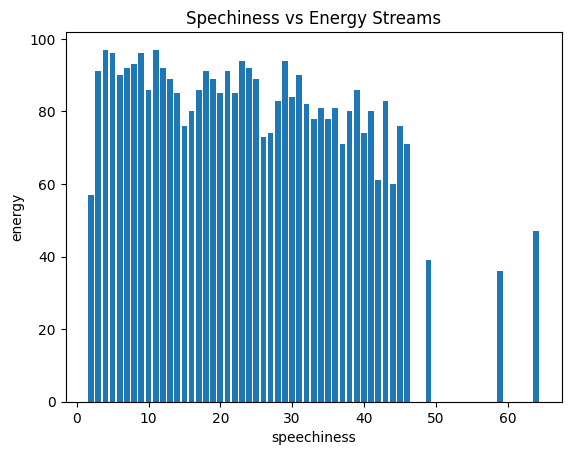

In [9]:
features = spotify_df[['speechiness_%', 'energy_%']]
label = spotify_df['streams']
plt.bar(features['speechiness_%'], features['energy_%'])
plt.title('Spechiness vs Energy Streams')
plt.xlabel('speechiness')
plt.ylabel('energy')
plt.show()

In [10]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

Hypothesis:

In [11]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_statistic, p_value = ttest_ind(spotify_df['speechiness_%'], spotify_df['energy_%'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference between speechiness and energy is statistically significant.")
else:
    print("The difference between speechiness and energy is not statistically significant.")

T-statistic: -86.54415486452417
P-value: 0.0
The difference between speechiness and energy is statistically significant.


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# It looks like the 'streams' column has a non-numeric type. Let's convert it to numeric.
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.dropna(subset=['streams'], inplace=True)

# Perform ANOVA test
model = ols('streams ~ C(mode)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df         F    PR(>F)
C(mode)   5.554572e+17    1.0  1.729963  0.188733
Residual  3.050263e+20  950.0       NaN       NaN


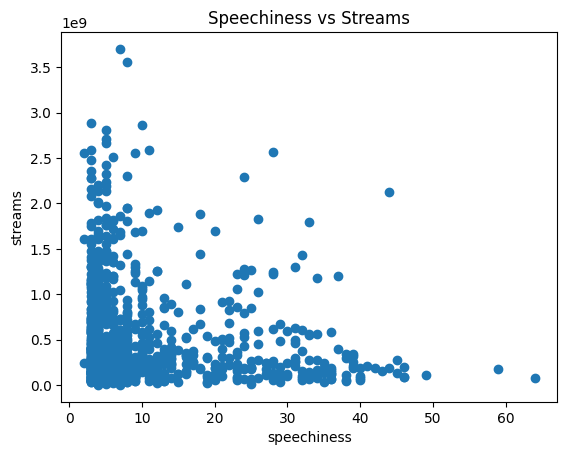

In [13]:
x = spotify_df['speechiness_%']
y = df['streams']
plt.scatter(x, y)
plt.xlabel('speechiness')
plt.ylabel('streams')
plt.title('Speechiness vs Streams')
plt.show()

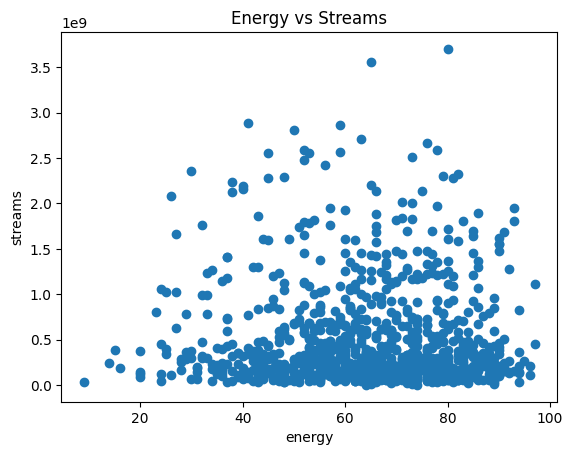

In [14]:
x = spotify_df['energy_%']
y = df['streams']
plt.scatter(x, y)
plt.xlabel('energy')
plt.ylabel('streams')
plt.title('Energy vs Streams')
plt.show()

In [15]:
# Calculate the correlation between the features and the target variable
correlation = spotify_df[['energy_%', 'speechiness_%', 'streams']].corr()
print(correlation)

               energy_%  speechiness_%   streams
energy_%       1.000000      -0.004632 -0.026051
speechiness_% -0.004632       1.000000 -0.112333
streams       -0.026051      -0.112333  1.000000


In [16]:
top_100_streamed = spotify_df.sort_values(by='streams', ascending=False).head(100)
display(top_100_streamed)

,track_name,artist(s)_name,streams,energy_%,speechiness_%
55,Blinding Lights,The Weeknd,3703895074,80,7
179,Shape of You,Ed Sheeran,3562543890,65,8
86,Someone You Loved,Lewis Capaldi,2887241814,41,3
620,Dance Monkey,Tones and I,2864791672,59,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550,50,5
...,...,...,...,...,...
274,Shivers,Ed Sheeran,1302184087,86,9
401,Heather,Conan Gray,1301799902,43,3
22,I Wanna Be Yours,Arctic Monkeys,1297026226,42,3
820,Iris,The Goo Goo Dolls,1284942608,72,4


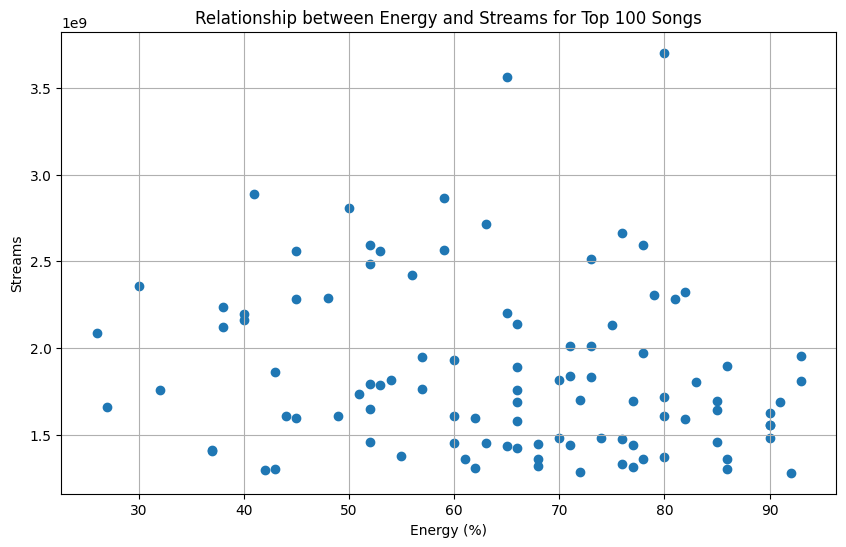

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(top_100_streamed['energy_%'], top_100_streamed['streams'])
plt.xlabel('Energy (%)')
plt.ylabel('Streams')
plt.title('Relationship between Energy and Streams for Top 100 Songs')
plt.grid(True)
plt.show()

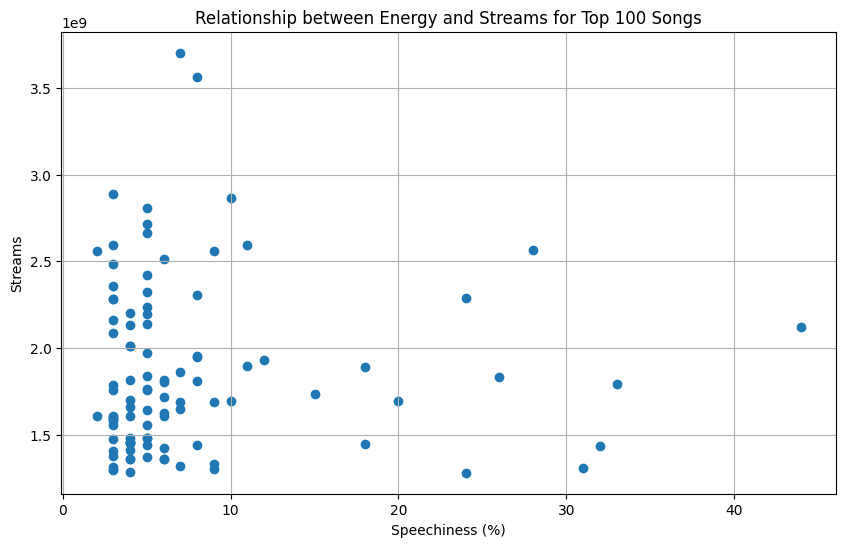

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(top_100_streamed['speechiness_%'], top_100_streamed['streams'])
plt.xlabel('Speechiness (%)')
plt.ylabel('Streams')
plt.title('Relationship between Energy and Streams for Top 100 Songs')
plt.grid(True)
plt.show()

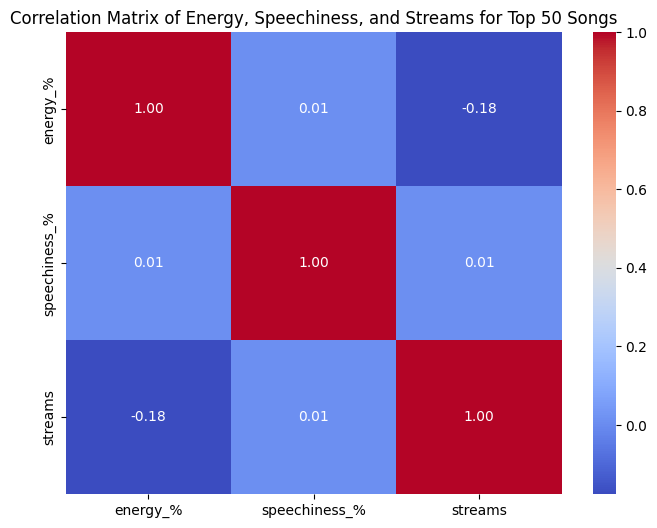

In [19]:
import seaborn as sns

correlation_matrix = top_100_streamed[['energy_%', 'speechiness_%', 'streams']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Energy, Speechiness, and Streams for Top 50 Songs')
plt.show()

In [20]:
# Define the independent variables (X) and the dependent variable (y)
X = spotify_df[['energy_%', 'speechiness_%']]
y = spotify_df['streams']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.408
Date:                Thu, 31 Jul 2025   Prob (F-statistic):            0.00172
Time:                        18:50:15   Log-Likelihood:                -20532.
No. Observations:                 952   AIC:                         4.107e+04
Df Residuals:                     949   BIC:                         4.108e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.378e+08   7.57e+07      8.426

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Selecting all numerical features from the original dataframe
numerical_features = df.select_dtypes(include=np.number)

# Drop the target variable from the features
X = numerical_features.drop('streams', axis=1)
y = numerical_features['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest R-squared: {r2}")
print(f"Random Forest Mean Squared Error: {mse}")

# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Random Forest R-squared: 0.7962532216060288
Random Forest Mean Squared Error: 4.987574579079912e+16

Feature Importance:
                 feature  importance
4   in_spotify_playlists    0.736466
6     in_apple_playlists    0.081242
1          released_year    0.050149
5      in_spotify_charts    0.021985
11             valence_%    0.013828
9                    bpm    0.012498
7        in_apple_charts    0.012426
15            liveness_%    0.012148
12              energy_%    0.011803
13        acousticness_%    0.010635
10        danceability_%    0.008339
2         released_month    0.007355
3           released_day    0.006488
8       in_deezer_charts    0.005917
16         speechiness_%    0.005684
0           artist_count    0.001888
14    instrumentalness_%    0.001146
